In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [3]:
politicians = [
    'Hitler', 'Mussolini', 'Churchill', 'Eisenhower', 'Stalin', 'Attlee',
    'Franco', 'De_Gaulle', 'Mao_Tse', 'Truman', 'Chamberlain', 'Tito'
]
data = {
    'Hitler': [0, 5, 11, 15, 8, 17, 5, 10, 16, 17, 12, 16],
    'Mussolini': [5, 0, 14, 16, 13, 18, 3, 11, 18, 18, 14, 17],
    'Churchill': [11, 14, 0, 7, 11, 11, 12, 5, 16, 8, 10, 8],
    'Eisenhower': [15, 16, 7, 0, 16, 16, 14, 8, 17, 6, 7, 12],
    'Stalin': [8, 13, 11, 16, 0, 15, 13, 11, 12, 14, 16, 12],
    'Attlee': [17, 18, 11, 16, 15, 0, 16, 12, 16, 12, 9, 13],
    'Franco': [5, 3, 12, 14, 13, 16, 0, 9, 17, 16, 10, 12],
    'De_Gaulle': [10, 11, 5, 8, 11, 12, 9, 0, 13, 9, 11, 7],
    'Mao_Tse': [16, 18, 16, 17, 12, 16, 17, 13, 0, 12, 17, 10],
    'Truman': [17, 18, 8, 6, 14, 12, 16, 9, 12, 0, 9, 11],
    'Chamberlain': [12, 14, 10, 7, 16, 9, 10, 11, 17, 9, 0, 15],
    'Tito': [16, 17, 8, 12, 12, 13, 12, 7, 10, 11, 15, 0]
}
print (data)

{'Hitler': [0, 5, 11, 15, 8, 17, 5, 10, 16, 17, 12, 16], 'Mussolini': [5, 0, 14, 16, 13, 18, 3, 11, 18, 18, 14, 17], 'Churchill': [11, 14, 0, 7, 11, 11, 12, 5, 16, 8, 10, 8], 'Eisenhower': [15, 16, 7, 0, 16, 16, 14, 8, 17, 6, 7, 12], 'Stalin': [8, 13, 11, 16, 0, 15, 13, 11, 12, 14, 16, 12], 'Attlee': [17, 18, 11, 16, 15, 0, 16, 12, 16, 12, 9, 13], 'Franco': [5, 3, 12, 14, 13, 16, 0, 9, 17, 16, 10, 12], 'De_Gaulle': [10, 11, 5, 8, 11, 12, 9, 0, 13, 9, 11, 7], 'Mao_Tse': [16, 18, 16, 17, 12, 16, 17, 13, 0, 12, 17, 10], 'Truman': [17, 18, 8, 6, 14, 12, 16, 9, 12, 0, 9, 11], 'Chamberlain': [12, 14, 10, 7, 16, 9, 10, 11, 17, 9, 0, 15], 'Tito': [16, 17, 8, 12, 12, 13, 12, 7, 10, 11, 15, 0]}


In [4]:
df_distance = pd.DataFrame(data, index=politicians, columns=politicians)

print("Distance Matrix (World War Politicians):")
print(df_distance)
print("-" * 50)

Distance Matrix (World War Politicians):
             Hitler  Mussolini  Churchill  Eisenhower  Stalin  Attlee  Franco  \
Hitler            0          5         11          15       8      17       5   
Mussolini         5          0         14          16      13      18       3   
Churchill        11         14          0           7      11      11      12   
Eisenhower       15         16          7           0      16      16      14   
Stalin            8         13         11          16       0      15      13   
Attlee           17         18         11          16      15       0      16   
Franco            5          3         12          14      13      16       0   
De_Gaulle        10         11          5           8      11      12       9   
Mao_Tse          16         18         16          17      12      16      17   
Truman           17         18          8           6      14      12      16   
Chamberlain      12         14         10           7      16       

In [5]:
df_distance

,Hitler,Mussolini,Churchill,Eisenhower,Stalin,Attlee,Franco,De_Gaulle,Mao_Tse,Truman,Chamberlain,Tito
Hitler,0,5,11,15,8,17,5,10,16,17,12,16
Mussolini,5,0,14,16,13,18,3,11,18,18,14,17
Churchill,11,14,0,7,11,11,12,5,16,8,10,8
Eisenhower,15,16,7,0,16,16,14,8,17,6,7,12
Stalin,8,13,11,16,0,15,13,11,12,14,16,12
Attlee,17,18,11,16,15,0,16,12,16,12,9,13
Franco,5,3,12,14,13,16,0,9,17,16,10,12
De_Gaulle,10,11,5,8,11,12,9,0,13,9,11,7
Mao_Tse,16,18,16,17,12,16,17,13,0,12,17,10
Truman,17,18,8,6,14,12,16,9,12,0,9,11


In [6]:
distance_matrix = df_distance.values
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

In [8]:
# Fit the model and transform the data
mds_result = mds.fit_transform(distance_matrix)

print("\nMDS Result (2-dimensional coordinates):")


MDS Result (2-dimensional coordinates):


In [9]:
mds_df = pd.DataFrame(mds_result, index=politicians, columns=['Dimension 1', 'Dimension 2'])
print(mds_df)
print("-" * 50)

             Dimension 1  Dimension 2
Hitler          8.456274     2.278292
Mussolini      10.843789    -0.692751
Churchill      -2.085066    -1.962687
Eisenhower     -2.807598    -8.156923
Stalin          3.651738     8.128422
Attlee        -10.963555    -0.284193
Franco          8.032692    -1.705265
De_Gaulle       0.030121     0.137088
Mao_Tse        -4.689717    11.041273
Truman         -6.549266    -5.089881
Chamberlain     0.919077    -8.319612
Tito           -4.838490     4.626237
--------------------------------------------------


## Interpretation
Here each individual is mapped into a two-dimensional space based on a precomputed distance matrix, showing their relative similarities and differences. Here, Hitler and Mussolini are positioned close together in the positive quadrant, suggesting strong similarity in the underlying data—likely reflecting their political alignment and historical roles. In contrast, Attlee and Churchill are widely separated, indicating distinct profiles. Stalin and Mao appear in the upper quadrants, hinting at ideological proximity, while figures like Truman and Eisenhower are located in the lower-left, suggesting a different cluster. This visualization helps uncover latent patterns and groupings that might not be immediately obvious from raw data, making it a powerful tool for historical and political analysis

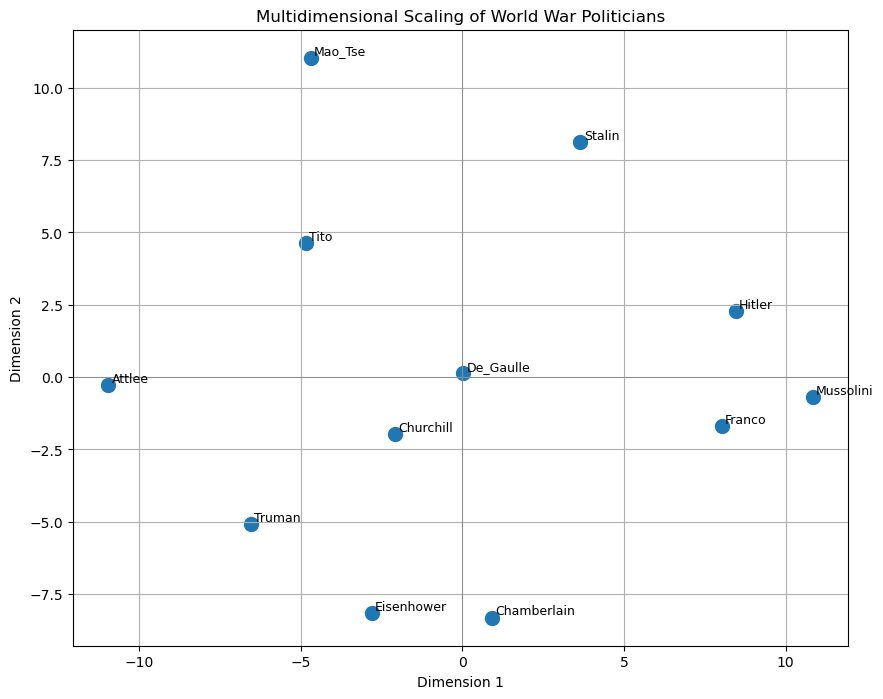

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1], s=100) # Plot points
# Annotate each point with the politician's name for clarity
for i, politician in enumerate(politicians):
    plt.annotate(politician, (mds_result[i, 0] + 0.1, mds_result[i, 1] + 0.1), fontsize=9)

plt.title('Multidimensional Scaling of World War Politicians')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5) # Add x-axis
plt.axvline(0, color='grey', linewidth=0.5) # Add y-axis
plt.show()

## Interpretation
The scatter plot titled "Multidimensional Scaling of World War Politicians" offers a fascinating interpretation of how historical figures from the World War era relate to one another based on underlying data-driven similarities. Each politician ranging from Churchill and Stalin to Mao Tse and Mussolini—is plotted in a two-dimensional space using MDS, which reduces complex relational data into a visual format.

The positioning of figures like Hitler, Mussolini, and Franco in close proximity suggests shared ideological or geopolitical traits, likely reflecting their roles as Axis powers or authoritarian leaders. On the other hand, Truman, Eisenhower, and Attlee are placed farther apart, indicating differing political stances or wartime roles. Stalin and Mao Tse appear in the upper quadrants, possibly representing communist alignment, while Chamberlain and De Gaulle occupy more isolated positions, hinting at unique or transitional roles in the war's narrative.